<a href="https://colab.research.google.com/github/santhoshbvsrk/Machine-Learning-Projects/blob/main/LeafClassification/LeafClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/santhoshbvsrk/Machine-Learning-Projects/main/LeafClassification/leaf_train.csv"
leaf_df=pd.read_csv(url)
leaf_df.head(3)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.0,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.0,0.0,0.006836,0.037109,0.007812,0.0,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.0,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.0,0.0,0.053711,0.036133,0.000977,0.0,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.0,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.0,0.0,0.000977,0.000000,0.154300,0.0,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930


In [3]:
#identifying missing values in the dataset
missing_df=leaf_df.isna().mean().round(4)*100 
missing_df[missing_df>0]

Series([], dtype: float64)

* From this we can say that there are no missing values in dataset

In [4]:
categorical_features=leaf_df.select_dtypes(include="object").columns
print("Categorical Features are:",categorical_features)

integer_features=leaf_df.select_dtypes(include="int").columns
print("Integer Features are:",integer_features)

float_features=leaf_df.select_dtypes(include="float").columns
print("Decimal Features are:",float_features)

Categorical Features are: Index(['species'], dtype='object')
Integer Features are: Index(['id'], dtype='object')
Decimal Features are: Index(['margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9', 'margin10',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=192)


* There is only one Categorical column "species" which is our target variable.
* All Features in the dataset are float values except for "id" feature.

In [5]:
leaf_df[leaf_df.duplicated(subset='id')]

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64


* From this we can say that feature "id" is a sequence without duplicates and hence can be ignored.

In [6]:
leaf_df.shape

(990, 194)

* There are 194 Features of which 1 is Target Variable and 1 feature (id) can be ignored, so there are a total of 192 features and 990 records.

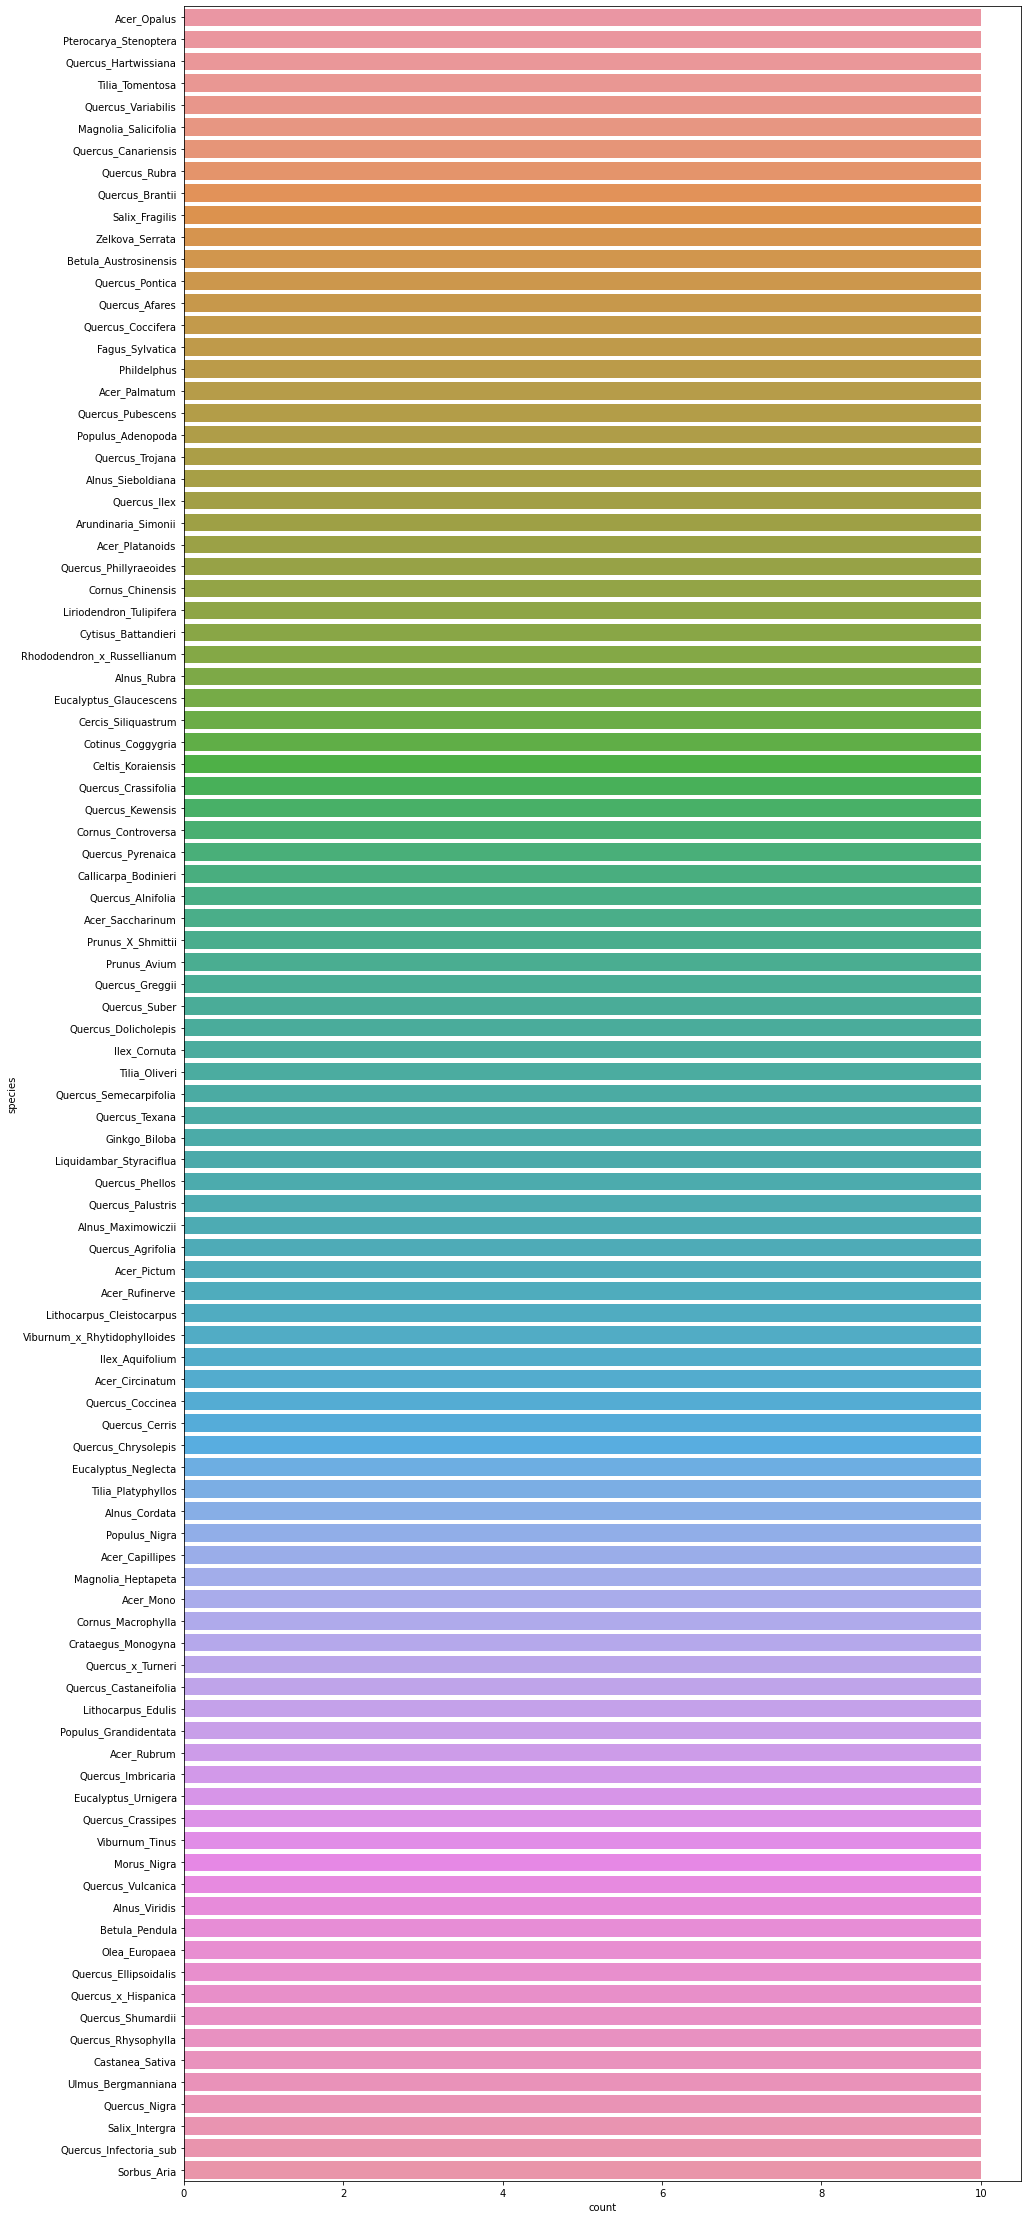

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,40))
sns.countplot(y='species',data=leaf_df)
plt.show()

In [8]:
leaf_df['species'].value_counts()

Quercus_Kewensis       10
Quercus_x_Turneri      10
Acer_Mono              10
Quercus_Canariensis    10
Alnus_Cordata          10
                       ..
Quercus_Coccifera      10
Quercus_Alnifolia      10
Quercus_Imbricaria     10
Quercus_Pyrenaica      10
Quercus_Palustris      10
Name: species, Length: 99, dtype: int64

* From this plot we can say that there are 99 different species and that it is a balanced dataset with 10 records for each specie.

In [9]:
#prepare feature & target variables
feature_cols=leaf_df.drop(columns=['species','id'],axis=1).columns
target_var=leaf_df['species']
X=leaf_df[feature_cols]
y=target_var

* Let us split our data for training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(693, 192)
(297, 192)


* Let us perform Feature Selection to find out which Features are important.
* Approach1: VarianceThreshold

In [15]:
from sklearn.feature_selection import VarianceThreshold
sel_variance_threshold = VarianceThreshold(threshold=0)
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)
print(X_train_remove_variance.shape)

(693, 192)


* Variance Threshold (Approach1) couldn't find any features for elimination.

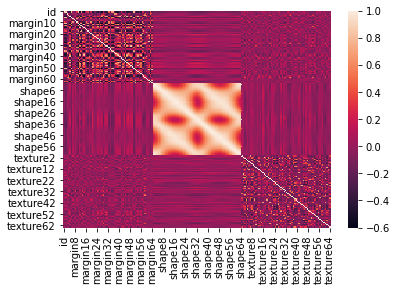

In [17]:
import seaborn as sns
sns.heatmap(leaf_df.corr())

* Approach2: Using RFE (Recursive Feature Elimination)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

models=dict()
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=30, step=1)
model = DecisionTreeClassifier()
models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])

In [13]:
models

{'rf': Pipeline(memory=None,
          steps=[('s',
                  RFE(estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

print(best_clf.best_estimator_)
# View best hyperparameters
#print('Best Penalty:', best_clf.best_estimator_.get_params()["classifier__penalty"])
#print('Best C:', best_clf.best_estimator_.get_params()['classifier__C'])

In [ ]:
# Predict target vector
best_clf.predict(X_test)

In [ ]:
best_clf.best_estimator_.get_params()

In [ ]:
#import LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#instantiate the model
logreg = LogisticRegression()
#fit the model
logreg.fit(leaf_df[feature_cols],target_Var)